In [7]:
import torch
import matplotlib.pyplot as plt

In [5]:
#dummy data
weight = 0.7
bias = 0.3

X = torch.arange(0,1,0.02)

y = weight * X + bias

X.shape , y.shape 

(torch.Size([50]), torch.Size([50]))

In [3]:
X[:5], y[:5] 

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800]),
 tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560]))

In [6]:
#split the data into training and testing set
#[80% training, and %20 testing]

train_split = int(0.8*len(X))

X_train, X_test = X[:train_split], X[train_split:]

y_train, y_test = y[:train_split], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

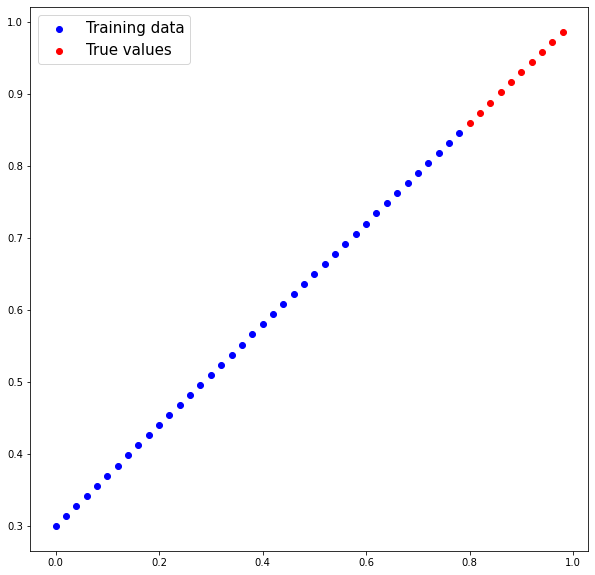

In [41]:
def plot_prediction(train_data=X_train, 
                    train_labels=y_train,
                    test_data=X_test, 
                    test_labels=y_test,
                    predictions=None):
    """
    Plots training and testing data and predictions
    """
    plt.figure(figsize=(10, 10))  
    
    # Plot training data
    plt.scatter(train_data, train_labels,
                color='blue',
                label='Training data')

    # Plot test data
    plt.scatter(test_data, test_labels,
                color='red',
                label='True values')

    # Plot predicted values if available
    if predictions is not None:
        plt.scatter(test_data, predictions,
                    color='green',
                    label='Predicted values')

    # Show the legend
    plt.legend(prop={"size": 15})

    # Show the plot
    plt.show()

plot_prediction()

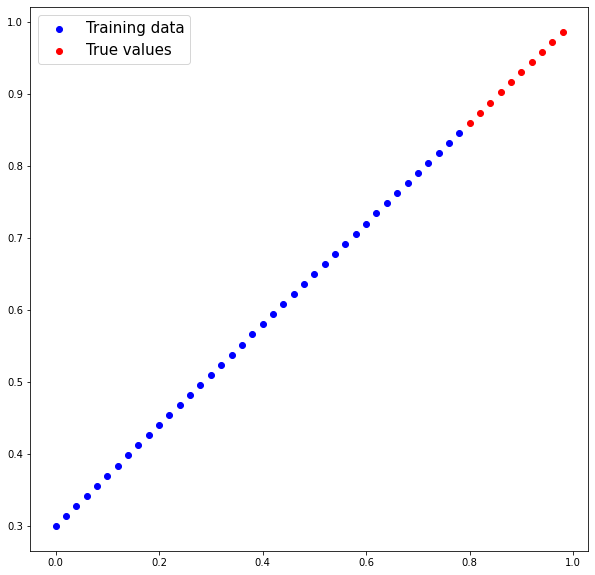

In [42]:
plot_prediction()

## building the model 

In [20]:
import torch.nn as nn

In [31]:
# create a linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,dtype=torch.float),
                                    requires_grad=True) 
        self.bias = nn.Parameter(torch.randn(1,dtype=torch.float),
                                requires_grad=True)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor: # takes self and x(torch.tensor) and return torch.Tensor
        # y = weight * x + bias  -> -> -> x is the input in my model
        return self.weights * x + self.bias

In [32]:
# check the content of the model
torch.manual_seed(42)
# create an instance of LinearRegressionModel
model0 = LinearRegressionModel()

In [33]:
# To see parameters of the model 
list(model0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [34]:
# state dictionary -> parameters of the model and its values
model0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [35]:
# y = weight(0.3367) * x + bias(0.1288)
# these are the random weights of the model
# if we want to plot the output of the model beore training 

In [36]:
# how to make a [prediction] using this model  inference_mode same as autograd
with torch.inference_mode():
    y_preds = model0(X_test)
    

In [38]:
print(len(y_preds))
print(len(X_test))

10
10


In [39]:
print(y_preds)

tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588])


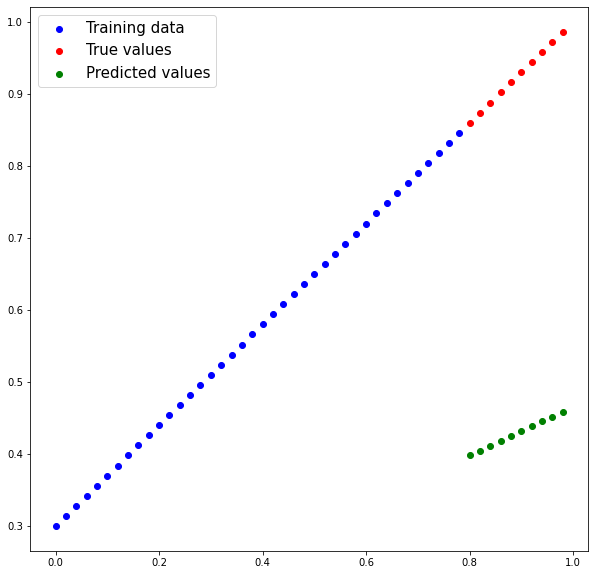

In [43]:
plot_prediction(predictions=y_preds)

# training the model

In [44]:
# create a loss function
loss_function = nn.L1Loss()


In [45]:
# create an optimizer
optimizer = torch.optim.SGD(params=model0.parameters(),
                            lr=0.01)

In [50]:
torch.manual_seed(42)
epochs = 200

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    model0.train()
    
    # forward pass
    y_pred = model0(X_train)

    # calc the loss
    loss = loss_function(y_pred, y_train)

    # zero grad
    optimizer.zero_grad()

    # backward pass
    loss.backward()

    # update weights
    optimizer.step()

    # evaluation mode
    model0.eval()

    with torch.inference_mode():
        test_pred = model0(X_test)

        # calc the test loss
        test_loss = loss_function(test_pred, y_test)

    # print after each 10 epochs
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())      
        print(f'Epoch: {epoch} | Train Loss: {loss} | Test Loss: {test_loss}')


Epoch: 0 | Train Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
Epoch: 10 | Train Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
Epoch: 20 | Train Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
Epoch: 30 | Train Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
Epoch: 40 | Train Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
Epoch: 50 | Train Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
Epoch: 60 | Train Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
Epoch: 70 | Train Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
Epoch: 80 | Train Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
Epoch: 90 | Train Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
Epoch: 100 | Train Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
Epoch: 110 | Train Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
Epoch: 120 | Train Loss: 0.008932482451200485 | Tes